# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
vars = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

print("hola universidad Galileo")

hola universidad Galileo


## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [ ]:
# enter your code here
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR ",data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.601
Date:                Mon, 25 Jan 2021   Prob (F-statistic):             0.0578
Time:                        06:24:34   Log-Likelihood:                -18247.
No. Observations:                5406   AIC:                         3.650e+04
Df Residuals:                    5404   BIC:                         3.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0306      0.286    101.473      0.000      28.470      29.591
RIDAGEYR       0.0104      0.005      1.898      0.058      -0.000       0.021
==============================================================================
Omnibus:                     1027.316   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2085.479
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       5.035   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

Yes, but the relationship is not statistially significant(at 5% significance)

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

Not so confident, just 0.901 confident

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [ ]:
0.0091*20

0.182

It differs by 0.0091*20=0.182 units

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

It's very low, just 0.001 

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [ ]:
da.head()

,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,62,1,3,5.0,27.8,1
1,53,1,3,3.0,30.8,1
2,78,1,3,3.0,28.8,1
3,56,2,3,5.0,42.4,2
4,42,2,4,4.0,20.3,2


In [ ]:
# enter your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"})


da["RIDRETH1x"] = da.RIDRETH1.replace(
                        {1:"Mexican American",
                        2:"Other Hispanic",
                        3:"Non-Hispanic White",
                        4:"Non-Hispanic Black",
                        5:"Other Race - Including Multi-Racial"}
                                            )
da.head()

,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,RIAGENDRx,RIDRETH1x
0,62,1,3,5.0,27.8,1,Male,Non-Hispanic White
1,53,1,3,3.0,30.8,1,Male,Non-Hispanic White
2,78,1,3,3.0,28.8,1,Male,Non-Hispanic White
3,56,2,3,5.0,42.4,2,Female,Non-Hispanic White
4,42,2,4,4.0,20.3,2,Female,Non-Hispanic Black


In [ ]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR  + RIAGENDRx + RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     53.76
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           1.08e-64
Time:                        06:24:34   Log-Likelihood:                -18092.
No. Observations:                5406   AIC:                         3.620e+04
Df Residuals:                    5399   BIC:                         3.624e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           31.3011      0.351     89.122      0.000      30.613      31.990
RIAGENDRx[T.Male]                                   -1.0554      0.188     -5.627      0.000      -1.423      -0.688
RIDRETH1x[T.Non-Hispanic Black]                     -0.4870      0.303     -1.606      0.108      -1.082       0.108
RIDRETH1x[T.Non-Hispanic White]                     -1.8706      0.279     -6.699      0.000      -2.418      -1.323
RIDRETH1x[T.Other Hispanic]                         -1.0852      0.341     -3.182      0.001      -1.754      -0.417
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.8990      0.327    -14.972      0.000      -5.541      -4.258
RIDAGEYR                                             0.0074      0.005      1.383      0.167      -0.003       0.018
==============================================================================
Omnibus:                     1005.797   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2074.709
Skew:                           1.101   Prob(JB):                         0.00
Kurtosis:                       5.088   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

It  decreased from 0.0091 to 0.0065 

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

It slightly decreased

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

Around 0.054

__Q2d.__ What reference level did the software select for the ethnicity variable?

Mexican American

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [ ]:
# enter your code here
da_sample = da.sample(frac=0.25)

da_sample.describe()

,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,49.484467,1.516272,3.069527,3.423817,29.447337,1.579882
std,17.872351,0.499920,1.290936,1.286539,7.162587,0.536853
min,20.000000,1.000000,1.000000,1.000000,14.500000,1.000000
25%,34.000000,1.000000,2.000000,3.000000,24.375000,1.000000
50%,49.000000,2.000000,3.000000,4.000000,28.200000,2.000000
75%,64.000000,2.000000,4.000000,4.000000,33.200000,2.000000
max,80.000000,2.000000,5.000000,5.000000,64.600000,7.000000


In [ ]:
modelq3 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR  + RIAGENDRx + RIDRETH1x",data=da_sample)
resultq3 = modelq3.fit()
resultq3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     16.15
Date:                Mon, 25 Jan 2021   Prob (F-statistic):           5.11e-18
Time:                        06:24:34   Log-Likelihood:                -4532.8
No. Observations:                1352   AIC:                             9080.
Df Residuals:                    1345   BIC:                             9116.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           32.7467      0.709     46.202      0.000      31.356      34.137
RIAGENDRx[T.Male]                                   -1.1328      0.378     -2.993      0.003      -1.875      -0.390
RIDRETH1x[T.Non-Hispanic Black]                     -1.2496      0.625     -2.000      0.046      -2.475      -0.024
RIDRETH1x[T.Non-Hispanic White]                     -2.8794      0.569     -5.061      0.000      -3.996      -1.763
RIDRETH1x[T.Other Hispanic]                         -2.3147      0.695     -3.331      0.001      -3.678      -0.952
RIDRETH1x[T.Other Race - Including Multi-Racial]    -5.6379      0.653     -8.633      0.000      -6.919      -4.357
RIDAGEYR                                            -0.0060      0.011     -0.557      0.577      -0.027       0.015
==============================================================================
Omnibus:                      271.739   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              578.344
Skew:                           1.139   Prob(JB):                    2.60e-126
Kurtosis:                       5.253   Cond. No.                         314.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

Coeficients remain similar but estandard errors are almost twice for the smallest sample

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

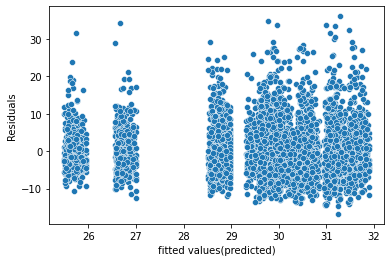

In [ ]:
# enter your code here
pp = sns.scatterplot(result.fittedvalues,result.resid)
pp.set_xlabel("fitted values(predicted)")
pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

modestly increasing mean/variance relationship, with a strange gap around 27 and 28.5

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [ ]:
da.head()

,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,RIAGENDRx,RIDRETH1x
0,62,1,3,5.0,27.8,1,Male,Non-Hispanic White
1,53,1,3,3.0,30.8,1,Male,Non-Hispanic White
2,78,1,3,3.0,28.8,1,Male,Non-Hispanic White
3,56,2,3,5.0,42.4,2,Female,Non-Hispanic White
4,42,2,4,4.0,20.3,2,Female,Non-Hispanic Black


/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/predict_functional.py:429: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bz /= sigma[:, None]
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


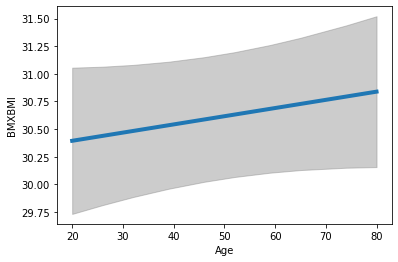

In [ ]:
# enter your code here
from statsmodels.sandbox.predict_functional import predict_functional
values = {"RIAGENDR":1,"RIAGENDRx":"Male",
         "RIDRETH1":1,"RIDRETH1x":"Mexican American",
         "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

predicted_vals,confidence_bands,function_values = predict_functional(result,"RIDAGEYR",
                                                                    values=values,ci_method="simultaneous")

ax = sns.lineplot(function_values, predicted_vals, lw=4)
ax.fill_between(function_values, confidence_bands[:, 0], confidence_bands[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMXBMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

Not sure, 30?

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/predict_functional.py:429: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bz /= sigma[:, None]
/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/predict_functional.py:429: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bz /= sigma[:, None]
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the followi

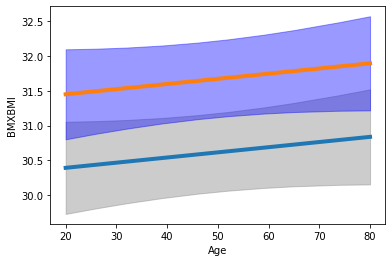

In [ ]:

values = {"RIAGENDR":1,"RIAGENDRx":"Male",
         "RIDRETH1":1,"RIDRETH1x":"Mexican American",
         "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

predicted_vals_1,confidence_bands_1,function_values_1 = predict_functional(result,"RIDAGEYR",
                                                                    values=values,ci_method="simultaneous")


values = {"RIAGENDR":2,"RIAGENDRx":"Female",
         "RIDRETH1":1,"RIDRETH1x":"Mexican American",
         "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

predicted_vals_2,confidence_bands_2,function_values_2 = predict_functional(result,"RIDAGEYR",
                                                                    values=values,ci_method="simultaneous")

ax = sns.lineplot(function_values_1, predicted_vals_1, lw=4)
sns.lineplot(function_values_2,predicted_vals_2,lw=4)
ax.fill_between(function_values_1, confidence_bands_1[:, 0], confidence_bands_1[:, 1], color='grey', alpha=0.4)
ax.fill_between(function_values_2, confidence_bands_2[:, 0], confidence_bands_2[:, 1], color='blue', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMXBMI")

They overlap at all ages

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

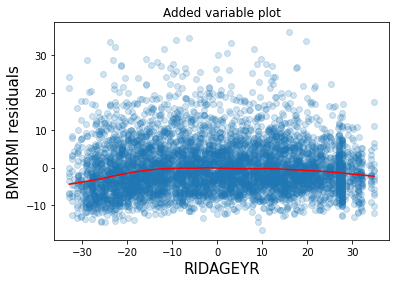

In [ ]:
# enter your code here
from statsmodels.graphics.regressionplots import add_lowess

model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR  + RIAGENDRx + RIDRETH1x",data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

The BMI increases at a higher rate at young ages(relationshipt not completely lineal)

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [ ]:
# enter your code here
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
vars = ["RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020","ALQ110"]
da = da[vars].dropna()
da["da_b"] = (da.ALQ110==1).astype(int)
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})
da.head()

,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,ALQ110,da_b,RIAGENDRx,DMDEDUC2x
3,56,2,3,5.0,42.4,2,1.0,1,Female,College
4,42,2,4,4.0,20.3,2,1.0,1,Female,SomeCollege
5,72,2,1,2.0,28.6,2,2.0,0,Female,x9_11
13,67,2,2,5.0,43.7,2,1.0,1,Female,College
19,54,2,5,4.0,26.3,2,2.0,0,Female,SomeCollege


In [ ]:
summary = pd.crosstab(da.RIAGENDRx,da.da_b).apply(lambda x: x/x.sum(),axis=1)
summary["odds"] = summary.loc[:,1]/summary.loc[:,0]
summary["log_odds"] = np.log(summary["odds"])

summary

da_b,0,1,odds,log_odds
RIAGENDRx,,,,
Female,0.550450,0.449550,0.816694,-0.202491
Male,0.543237,0.456763,0.840816,-0.173382


In [ ]:
summary.log_odds.Male - summary.log_odds.Female

0.02910882166493084

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

No, log odds is less than 0 for female

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

Just a small diff

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [ ]:
# enter your code here
model = sm.GLM.from_formula("da_b ~ RIAGENDRx",family=sm.families.Binomial(),data = da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   da_b   No. Observations:                 1561
Model:                            GLM   Df Residuals:                     1559
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1074.7
Date:                Mon, 25 Jan 2021   Deviance:                       2149.3
Time:                        06:24:36   Pearson chi2:                 1.56e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2025      0.060     -3.356      0.001      -0.321      -0.084
RIAGENDRx[T.Male]     0.0291      0.112      0.260      0.795      -0.191       0.249
=====================================================================================
"""

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

There is not significative statistical evidence (p value for null hyhpotesis is high)

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

yes, it matches

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [ ]:
# enter your code here
model = sm.GLM.from_formula("da_b ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x",
                           family=sm.families.Binomial(),data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   da_b   No. Observations:                 1559
Model:                            GLM   Df Residuals:                     1552
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1050.5
Date:                Mon, 25 Jan 2021   Deviance:                       2100.9
Time:                        06:24:36   Pearson chi2:                 1.56e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4119      0.186     -2.216      0.027      -0.776      -0.048
RIAGENDRx[T.Male]            0.0123      0.114      0.108      0.914      -0.211       0.236
DMDEDUC2x[T.HS]             -0.0631      0.157     -0.401      0.688      -0.372       0.245
DMDEDUC2x[T.SomeCollege]     0.0937      0.147      0.638      0.524      -0.194       0.382
DMDEDUC2x[T.lt9]            -0.8512      0.171     -4.966      0.000      -1.187      -0.515
DMDEDUC2x[T.x9_11]          -0.4714      0.182     -2.583      0.010      -0.829      -0.114
RIDAGEYR                     0.0078      0.003      2.671      0.008       0.002       0.014
============================================================================================
"""

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

DMDEDUC2x[T.lt9], DMDEDUC2x[T.x9_11] ,RIDAGEYR

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

In [ ]:
np.exp(0 + 50*0.0078)

1.4769807938826425

odds = 1.4769807938826425

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

Yes, it is almost half after adding it

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

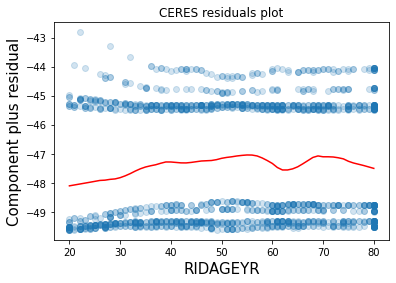

In [ ]:
# enter your code here
fig = result.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking? Yes, the plot suggests non linearities